In [27]:
# Importing libraries
import pandas as pd  # For working with data tables
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For data visualization
import gdown  # For downloading files from Google Drive

# Downloading training dataset
train_file_id = '1DdyFZ9fizNFyinCvnW3npY7S43bkzD63'
train_file_name = 'Train.csv'  # New file name
train_url = f'https://drive.google.com/uc?id={train_file_id}'
gdown.download(train_url, train_file_name, quiet=False)
training_data = pd.read_csv(train_file_name)

# Downloading testing dataset
test_file_id = '1vii5mpTPPrSExmg5S0eVcL4cmdLi-F9L'
test_file_name = 'Test.csv'
test_url = f'https://drive.google.com/uc?id={test_file_id}'
gdown.download(test_url, test_file_name, quiet=False)
testing_data = pd.read_csv(test_file_name)

# extracting numerical data from columns
def extract(text):
    try:
        return float(text.split()[0])
    except:
        return np.nan  #nan-not a number

Downloading...
From: https://drive.google.com/uc?id=1DdyFZ9fizNFyinCvnW3npY7S43bkzD63
To: /content/Train.csv
100%|██████████| 404k/404k [00:00<00:00, 5.31MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vii5mpTPPrSExmg5S0eVcL4cmdLi-F9L
To: /content/Test.csv
100%|██████████| 134k/134k [00:00<00:00, 4.05MB/s]


In [28]:
# Display the first few rows
print(training_data.head())


   Unnamed: 0                                        Name   Location  Year  \
0           0         Tata Tiago 1.2 Revotron XZ WO Alloy  Hyderabad  2017   
1           1  Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT      Kochi  2017   
2           2      Skoda Rapid 2013-2016 1.6 MPI Ambition     Mumbai  2014   
3           3                     Tata Indica V2 DLS BSII     Jaipur  2007   
4           4        Tata Manza Club Class Quadrajet90 LX     Mumbai  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              16500    Petrol       Manual      First  23.84 kmpl  1199 CC   
1              47357    Diesel    Automatic      First  18.49 kmpl  1493 CC   
2              35000    Petrol       Manual      First   15.0 kmpl  1598 CC   
3             200000    Diesel       Manual     Second   17.2 kmpl  1396 CC   
4              64000    Diesel       Manual     Second  21.02 kmpl  1248 CC   

        Power  Seats  Price  
0      84 bhp    5.0   5.0

In [29]:
# for separtating the numeric data from it s units under below columns
for c in ['Mileage', 'Engine', 'Power']:
    training_data[c] = training_data[c].apply(extract)
    testing_data[c] = testing_data[c].apply(extract)
training_data = training_data.dropna()

In [35]:
#selecting features
xf = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
X_train = training_data[xf].values
y_train = training_data['Price'].values
X_test = testing_data[xf].values
y_test_actual = testing_data['Price'].values


In [36]:

#feature scaling (mean=0 and std dev=1) to improve gradient descent
def mean_normalization(data):
    x_mean = np.mean(data, axis=0)
    x_std = np.std(data, axis=0) #std deviation
    x_std[x_std == 0] = 1
    x_normalized = (data - x_mean) / x_std
    return x_normalized



In [37]:
#to find the error in predictions

def cost_function(X, y, weights, bias):
    m = len(y)  # Total number of training examples
    predictions = X.dot(weights) + bias
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)  # Compute cost
    return cost


def gradient_descent(X, y, weights, bias, learning_rate, epoch):
    m = len(y)  # Number of training examples
    cost_history = np.zeros(epoch)
    if m == 0:
        raise ValueError("Training dataset is empty")

    for i in range(epoch):
        predictions = X.dot(weights) + bias
        errors = predictions - y

        # Calculate gradients for weights and bias
        weight_gradient = (1 / m) * X.T.dot(errors) #dJ/dw
        bias_gradient = (1 / m) * np.sum(errors) #dJ/db

        # Update weights and bias
        weights -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient

        # Calculate cost with separate weights and bias
        cost = cost_function(X, y, weights, bias)
        cost_history[i] = cost

        # prints errors every 100 iterations
        if i % 100 == 0:

            mse = mean_squared_error(y, predictions)
            rmse = np.sqrt(mse)
            r2 = r_squared(y, predictions)
            print(f"Iteration {i}: MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, Cost: {cost}")

    return weights, bias, cost_history

def linear_regression(X, y, learning_rate, epoch):
    n = X.shape[1]  # Number of features
    weights = np.zeros(n)  # Initialize weights as array of n zeros
    bias = 0.0  # Initialize bias

    weights, bias, cost_history = gradient_descent(X, y, weights, bias, learning_rate, epoch)
    return weights, bias, cost_history

# Function to predict the dataset values
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

# Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return (np.mean((y_true - y_pred) ** 2))

# R-squared
def r_squared(y_true, y_pred):
    total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
    residual_variance = np.sum((y_true - y_pred) ** 2)
    return (1 - (residual_variance / total_variance))

In [52]:
#data normalized
X_train_scaled = mean_normalization(X_train)
X_test_scaled = mean_normalization(X_test)



learning_rate = 0.05
iterations = 1000

# Training model
weights, bias, cost_history = linear_regression(X_train_scaled, y_train, learning_rate, iterations)


print("\nFinal cost:", cost_history[-1])
print("Final weights:", weights)
print("Final bias:", bias)

# Final predictions on testing data
y_pred = predict(X_test_scaled, weights, bias)

# Errors




print(f"Mean Squared Error on test set: {mse}")
print(f"R-squared score on test set: {r2}")

Iteration 0: MSE: 219.99, RMSE: 14.83, R²: -0.7306, Cost: 98.0271696901678
Iteration 100: MSE: 41.95, RMSE: 6.48, R²: 0.6700, Cost: 20.971617236025814
Iteration 200: MSE: 41.79, RMSE: 6.46, R²: 0.6712, Cost: 20.89557605735585
Iteration 300: MSE: 41.73, RMSE: 6.46, R²: 0.6717, Cost: 20.863647033181866
Iteration 400: MSE: 41.70, RMSE: 6.46, R²: 0.6720, Cost: 20.84892941618522
Iteration 500: MSE: 41.68, RMSE: 6.46, R²: 0.6721, Cost: 20.842142580300468
Iteration 600: MSE: 41.68, RMSE: 6.46, R²: 0.6721, Cost: 20.83901288400414
Iteration 700: MSE: 41.68, RMSE: 6.46, R²: 0.6722, Cost: 20.837569647983166
Iteration 800: MSE: 41.67, RMSE: 6.46, R²: 0.6722, Cost: 20.836904110462168
Iteration 900: MSE: 41.67, RMSE: 6.46, R²: 0.6722, Cost: 20.836597202799883

Final cost: 20.83645661576081
Final weights: [ 3.28475143 -0.58979259 -0.20870634  1.94084142  6.80977058 -0.7638017 ]
Final bias: 9.636916963551606
Mean Squared Error on test set: nan
R-squared score on test set: nan


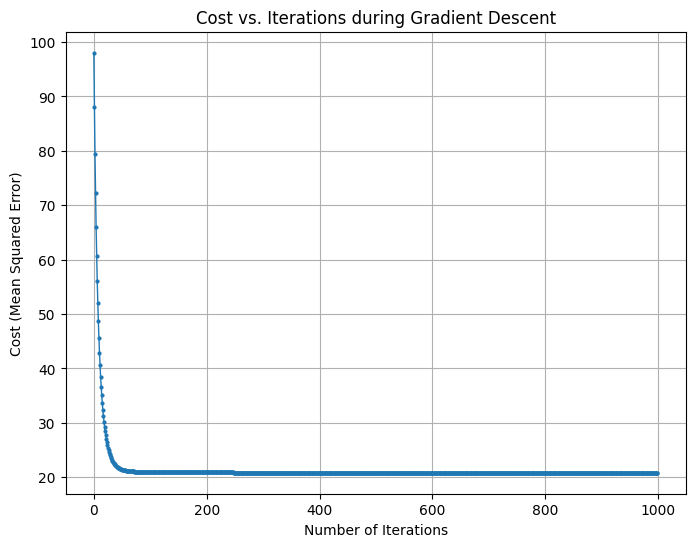

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), cost_history, '-o', linewidth=1, markersize=2)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (Mean Squared Error)')
plt.title('Cost vs. Iterations during Gradient Descent')
plt.grid(True)
plt.show()